# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
!pip install xlrd

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)

import numpy as np

## 1. Read in the file using pandas, and look at the first five rows

In [3]:
# df = pd.read_excel("KyotoFullFlower7.xls")
# df.head()

## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [4]:
df = pd.read_excel("KyotoFullFlower7.xls",
                   skiprows = range(0, 25))
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [5]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [6]:
df = pd.read_excel("KyotoFullFlower7.xls",
                    skiprows = range(0, 25),
                    na_values=["NaN", "-"],
                  )
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns = df.columns.str.lower().str.replace("-", "_")
df.head()

,ad,full_flowering_date_(doy),full_flowering_date,source_code,data_type_code,reference_name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [8]:
df.source_code.value_counts()

3.0    342
4.0    250
1.0    105
5.0     59
7.0     40
2.0     17
6.0      9
8.0      5
Name: source_code, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [9]:
# df['full_flowering_date_(doy)'].isna().value_counts()

In [10]:
df = df.dropna(subset=['full_flowering_date_(doy)'])
df

,ad,full_flowering_date_(doy),full_flowering_date,source_code,data_type_code,reference_name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
...,...,...,...,...,...,...
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 7. Make a histogram of the full-flowering date

<AxesSubplot:>

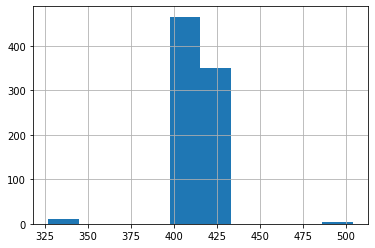

In [11]:
df.full_flowering_date.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<AxesSubplot:>

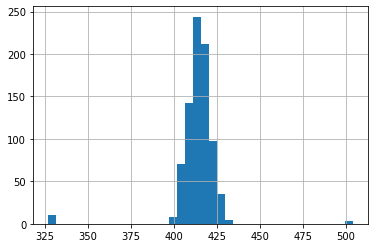

In [12]:
df.full_flowering_date.hist(bins=38)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [13]:
df['full_flowering_date_(doy)'].describe()

count    827.000000
mean     104.540508
std        6.407036
min       86.000000
25%      100.000000
50%      105.000000
75%      109.000000
max      124.000000
Name: full_flowering_date_(doy), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [14]:
df[df.ad < 1990]['full_flowering_date_(doy)'].mean()

104.81897627965044

## 11. How about after 1900?

In [15]:
df[df.ad > 1990]['full_flowering_date_(doy)'].mean()

96.28

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [16]:
df[df.data_type_code == 4].data_type_code.value_counts()

4.0    39
Name: data_type_code, dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [30]:
df[df.data_type_code == 4]

,ad,full_flowering_date_(doy),full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month,day_of_month,date
90,891,109.0,1900-04-19,5.0,4.0,NIHONKIRYAKU,NaN,April,19,April 19
94,895,104.0,1900-04-14,5.0,4.0,NIHONKIRYAKU,NaN,April,14,April 14
95,896,104.0,1900-04-13,5.0,4.0,NIPPON-SANDAI-JITSUROKU,NaN,April,13,April 13
122,923,104.0,1900-04-14,5.0,4.0,ZOKU-KOKIN-WAKASHU,NaN,April,14,April 14
154,955,89.0,1900-03-30,5.0,4.0,SHUISHO,NaN,March,30,March 30
168,969,98.0,1900-04-08,5.0,4.0,NIHONKIRYAKU,NaN,April,08,April 08
206,1007,106.0,1900-04-16,5.0,4.0,MIDO-KAMPAKUKI,NaN,April,16,April 16
232,1033,102.0,1900-04-12,5.0,4.0,NIHONKIRYAKU,NaN,April,12,April 12
235,1036,104.0,1900-04-13,5.0,4.0,NIHONKIRYAKU,NaN,April,13,April 13
259,1060,108.0,1900-04-17,5.0,4.0,SHIN-SENZAI-WAKASHU,NaN,April,17,April 17


## 14. Graph the full-flowering date (DOY) over time

<AxesSubplot:>

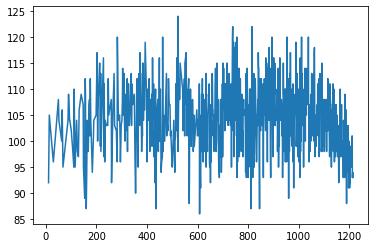

In [18]:
df['full_flowering_date_(doy)'].plot() # Why is it going only until 1200?

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [31]:
df.rolling(10, on='ad', min_periods=5)['full_flowering_date_(doy)'].mean().tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 11 to 1214
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ad                         827 non-null    int64         
 1   full_flowering_date_(doy)  827 non-null    float64       
 2   full_flowering_date        827 non-null    datetime64[ns]
 3   source_code                827 non-null    float64       
 4   data_type_code             827 non-null    float64       
 5   reference_name             825 non-null    object        
 6   rolling_date               5 non-null      float64       
 7   month                      827 non-null    object        
 8   day_of_month               827 non-null    object        
 9   date                       827 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 71.1+ KB


In [28]:
df['rolling_date'] = df.rolling(20, on='ad', min_periods=5)['full_flowering_date_(doy)'].mean().tail()
df.rolling_date

11        NaN
14        NaN
30        NaN
50        NaN
52        NaN
        ...  
1210    96.45
1211    96.80
1212    96.60
1213    96.35
1214    96.05
Name: rolling_date, Length: 827, dtype: float64

<AxesSubplot:>

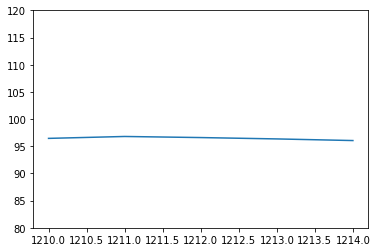

In [29]:
df.rolling_date.plot(ylim=(80, 120))

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 11 to 1214
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ad                         827 non-null    int64  
 1   full_flowering_date_(doy)  827 non-null    float64
 2   full_flowering_date        827 non-null    float64
 3   source_code                827 non-null    float64
 4   data_type_code             827 non-null    float64
 5   reference_name             825 non-null    object 
 6   rolling_date               823 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 51.7+ KB


Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

There are **at least two ways to do this.**

#### WAY ONE: The bad-yet-simple way

If you don't want to use `pd.to_datetime`, you can use this as an sample for updating March. It finds everything with a date less than 400 and assigns `March` to the `month` column:

```python
df.loc[df['Full-flowering date'] < 400, 'month'] = 'March'
```

#### WAY TWO: The good-yet-complicated way

* When you use `pd.to_datetime`, if pandas doesn't figure it out automatically you can also pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df.colname, "format='%Y-%m-%d")`.
* `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"
* And remember how we used `df.date_column.dt.month` to get the number of the month? For the name, you use `dt.strftime` (string-formatted-time), and pass it [the same codes](https://strftime.org/) to tell it what to do. For example, `df.date_column.dt.strftime("%Y-%m-%d")` would give you `"2020-04-09"`.

In [23]:
df.full_flowering_date = pd.to_datetime(df.full_flowering_date, errors='coerce', format="%m%d") 
df['month'] = pd.to_datetime(df.full_flowering_date, errors='coerce', format="%m%d").dt.strftime('%B') # datetime format has to be in double-quotes?
df

,ad,full_flowering_date_(doy),full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month
11,812,92.0,1900-04-01,1.0,2.0,NIHON-KOKI,NaN,April
14,815,105.0,1900-04-15,1.0,2.0,NIHON-KOKI,NaN,April
30,831,96.0,1900-04-06,1.0,2.0,NIHON-KOKI,NaN,April
50,851,108.0,1900-04-18,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April
52,853,104.0,1900-04-14,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,April
...,...,...,...,...,...,...,...,...
1210,2011,99.0,1900-04-09,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,April
1211,2012,101.0,1900-04-10,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,April
1212,2013,93.0,1900-04-03,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,April
1213,2014,94.0,1900-04-04,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,April


### 17. Using your new column, how many blossomings happened in each month?

In [24]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

<AxesSubplot:>

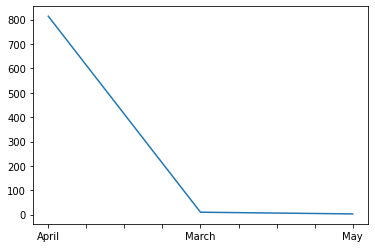

In [25]:
df.month.value_counts().plot()

### 19. Adding a day-of-month column

Now we're going to add a new column called `day_of_month.` It might be a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

*Tip: If your method involves `.astype(int)` it isn't going to work since it's missing data, you can add `.dropna().astype(int)` instead.*

In [26]:
# df.info()
df['day_of_month'] = pd.to_datetime(df.full_flowering_date, errors='coerce', format="%Y-%m-%d").dt.strftime('%d')
# df.day_of_month
df

,ad,full_flowering_date_(doy),full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month,day_of_month
11,812,92.0,1900-04-01,1.0,2.0,NIHON-KOKI,NaN,April,01
14,815,105.0,1900-04-15,1.0,2.0,NIHON-KOKI,NaN,April,15
30,831,96.0,1900-04-06,1.0,2.0,NIHON-KOKI,NaN,April,06
50,851,108.0,1900-04-18,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18
52,853,104.0,1900-04-14,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,April,14
...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,1900-04-09,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,April,09
1211,2012,101.0,1900-04-10,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,April,10
1212,2013,93.0,1900-04-03,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,April,03
1213,2014,94.0,1900-04-04,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,April,04


### 20. Adding a date column

If you don't have one yet, take the `'month'` and `'day_of_month'` columns and combine them in order to create a new column called `'date'`. You could alternatively use `.dt.strftime` as mentioned above.

In [27]:
df['date'] = df.month + " " + df.day_of_month
df

,ad,full_flowering_date_(doy),full_flowering_date,source_code,data_type_code,reference_name,rolling_date,month,day_of_month,date
11,812,92.0,1900-04-01,1.0,2.0,NIHON-KOKI,NaN,April,01,April 01
14,815,105.0,1900-04-15,1.0,2.0,NIHON-KOKI,NaN,April,15,April 15
30,831,96.0,1900-04-06,1.0,2.0,NIHON-KOKI,NaN,April,06,April 06
50,851,108.0,1900-04-18,1.0,2.0,MONTOKUTENNO-JITSUROKU,NaN,April,18,April 18
52,853,104.0,1900-04-14,1.0,2.0,MONTOKUTENNO-JITSUROKU,101.00,April,14,April 14
...,...,...,...,...,...,...,...,...,...,...
1210,2011,99.0,1900-04-09,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.45,April,09,April 09
1211,2012,101.0,1900-04-10,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.80,April,10,April 10
1212,2013,93.0,1900-04-03,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.60,April,03,April 03
1213,2014,94.0,1900-04-04,8.0,0.0,NEWS-PAPER(ARASHIYAMA),96.35,April,04,April 04


# YOU ARE DONE.

And **incredible.**